## Let's start by importing necessary libraries

In [25]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [26]:
data = pd.read_csv("Student Mental health.csv")

## Overview of the dataset

In [27]:
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.000,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.000,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.000,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.000,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.000,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


### Understand the shape of the dataset.

In [28]:
data.shape

(101, 11)

### Check the data types of the columns in the dataset.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

- Age have missing values

### Checking duplicates

In [30]:
data.duplicated().sum()

0

- There are no duplicates in the dataset.

### Checking missing values

In [31]:
data.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

Age -> 1

### Imputation of missing values 

In [32]:
def histogram_boxplot(data, feature, figsize=(10, 5), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  
        sharex=True, 
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    ) 
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    ) 
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    ) 

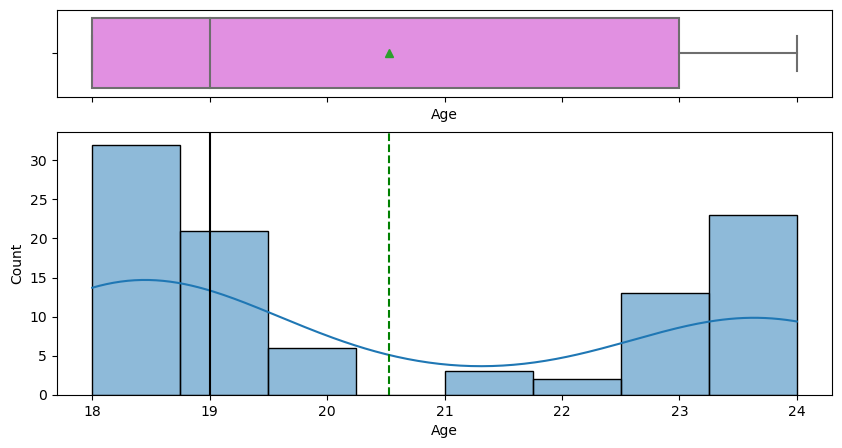

In [33]:
histogram_boxplot(data, "Age", kde=True)

In [34]:
data["Age"].fillna(data["Age"].median(), inplace=True)
print(data["Age"].isnull().sum())

0


### Info Data

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           101 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [36]:
data.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

### Categorical Values

In [37]:
cat_col = [
     'Choose your gender', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'
]
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Choose your gender
Female    75
Male      26
Name: count, dtype: int64
----------------------------------------
What is your course?
BCS                        18
Engineering                17
BIT                        10
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                        

In [38]:

data["Your current year of Study"] = data["Your current year of Study"].replace({
    "year 1": "Year 1",
    "year 2": "Year 2",
    "year 3": "Year 3",
    "year 4": "Year 4"
})


In [39]:
cat_col = [
     'Choose your gender', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'
]
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Choose your gender
Female    75
Male      26
Name: count, dtype: int64
----------------------------------------
What is your course?
BCS                        18
Engineering                17
BIT                        10
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                        

In [40]:

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature]) 
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            ) 
        else:
            label = p.get_height()  

        x = p.get_x() + p.get_width() / 2  
        y = p.get_height()  
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        ) 
    plt.show()

### Observations on Age

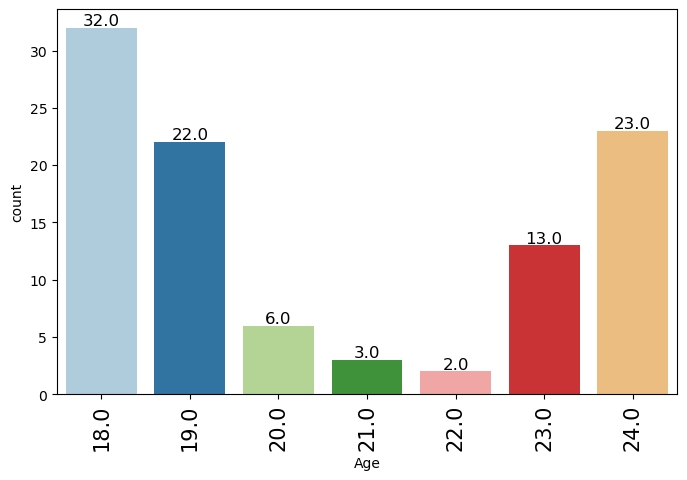

In [41]:
labeled_barplot(data, "Age")

### Observations on GPA

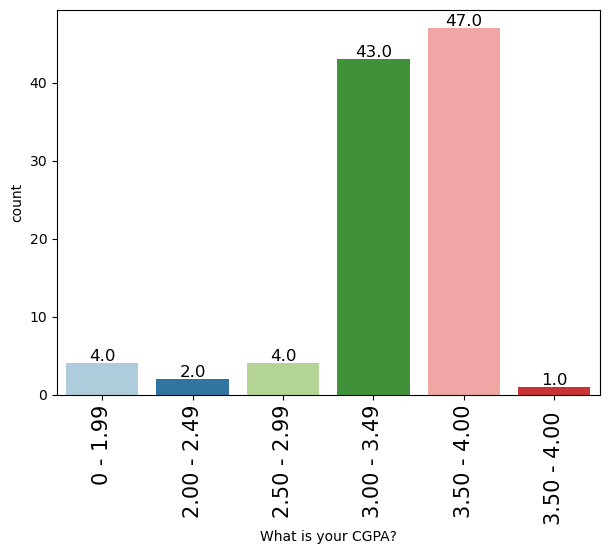

In [42]:
labeled_barplot(data, "What is your CGPA?")

In [43]:
df = data

In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object', 'string']).columns

categorical_mappings = {}
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  
    categorical_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,23,0,18.000,17,0,3,0,1,0,1,0
1,24,1,21.000,25,1,3,0,0,1,0,0
2,25,1,19.000,4,0,3,0,1,1,1,0
3,26,0,22.000,33,2,3,1,1,0,0,0
4,27,1,23.000,37,3,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
96,18,0,21.000,2,0,4,0,0,1,0,0
97,19,1,18.000,17,1,3,0,1,1,0,0
98,20,0,19.000,38,2,4,1,1,0,1,0
99,21,0,23.000,39,3,4,0,0,0,0,0


## Bivariate Analysis

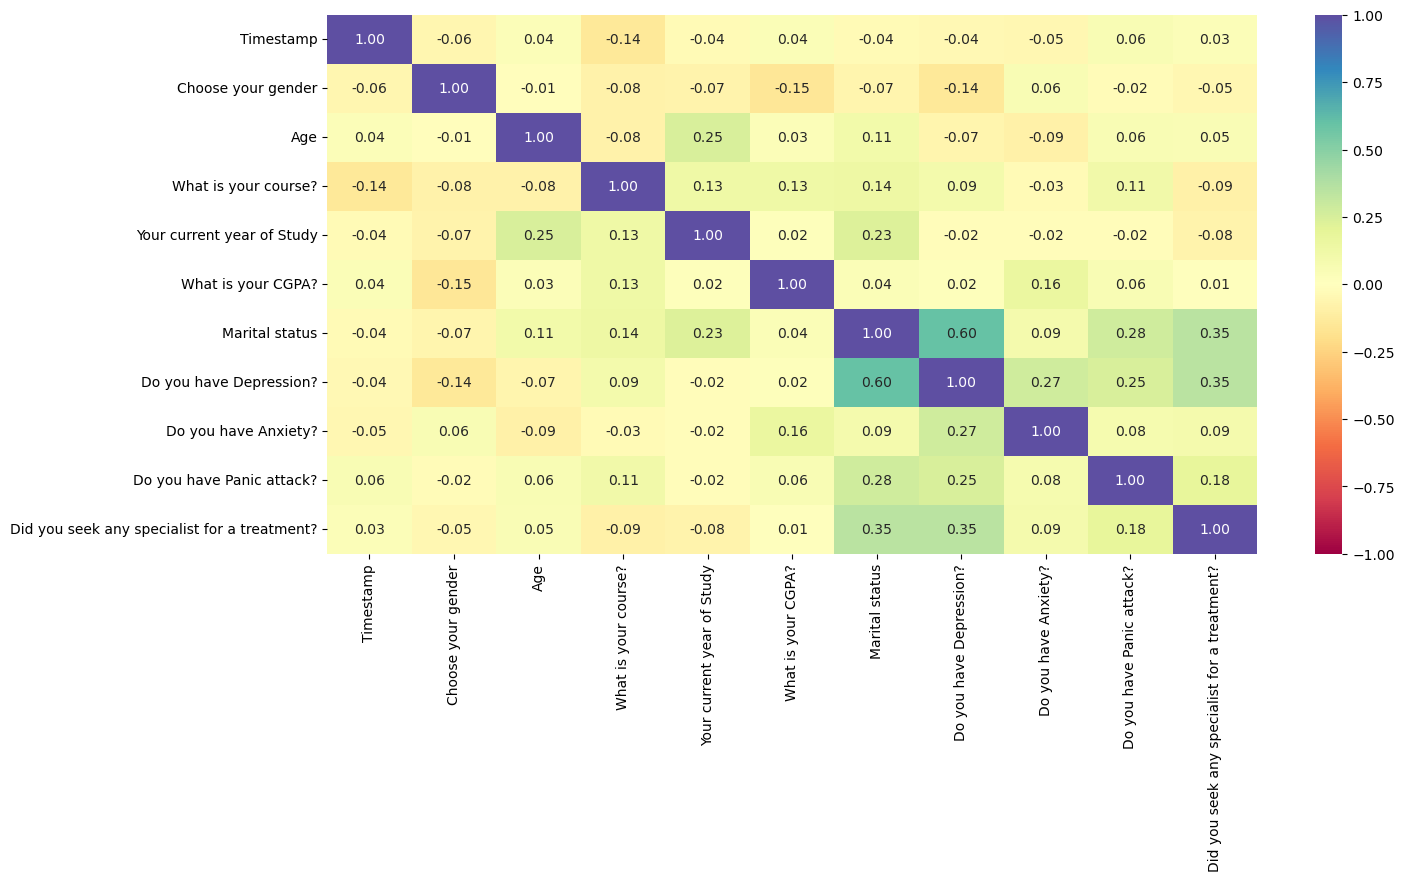

In [45]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Choose your gender:
- Female : 0
- Male : 1
- What is your course?: Cada curso tiene un código único, como:
- ALA : 0
- Accounting : 1
- BCS : 2
- Your current year of Study:
- Year 1 : 0
- Year 2 : 1
- Year 3 : 2
- What is your CGPA?:
-  0 - 1.99 : 0
-  2.00 - 2.49 : 1
-  3.50 - 4.00 : 4
- Marital status:
- No : 0
- Yes : 1
- Do you have Depression?
- Do you have Anxiety?
- Do you have Panic attack?
- Did you seek any specialist for a treatment?:
- No : 0
- Yes : 1

In [46]:
from sklearn.metrics.pairwise import cosine_similarity

X = (
    df.select_dtypes(include="number")
    .fillna(0)
)
y = df["Do you have Depression?"].fillna(0).values.reshape(1, -1)

cos_sim = cosine_similarity(X.T, y)

for i, col in enumerate(X.columns):
    print(f"{col}: {cos_sim[i][0]}")

Timestamp: 0.4959957900031907
Choose your gender: 0.1988980632395388
Age: 0.5779027182825711
What is your course?: 0.503890939819309
Your current year of Study: 0.4004783590320695
What is your CGPA?: 0.5703155706562346
Marital status: 0.6761234037828132
Do you have Depression?: 1.0
Do you have Anxiety?: 0.5217939320872035
Do you have Panic attack?: 0.5002164033860248
Did you seek any specialist for a treatment?: 0.4140393356054125


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

def plot_bar_chart(dictionary):
    keys = list(dictionary.keys())
    values = list(dictionary.values())
    cmap = plt.get_cmap("magma")
    colors = cmap(np.linspace(0.3, 0.7, len(keys)))
    plt.figure(figsize=(15, 7))
    plt.bar(keys, values, color=colors)
    plt.xlabel("Claves", fontsize=12)
    plt.ylabel("Similitud del Coseno", fontsize=12)
    plt.xticks(fontsize=10)
    plt.xticks(rotation=90)
    plt.tight_layout()  
    plt.show()

In [48]:
simulitud_coseno = {
"Timestamp": 0.4959957900031907,
"Choose your gender": 0.1988980632395388,
"Age": 0.5779027182825711,
"What is your course?": 0.503890939819309,
"Your current year of Study": 0.504634503691094,
"What is your CGPA?": 0.5703155706562346,
"Marital status": 0.6761234037828132,
"Do you have Depression?": 1.0,
"Do you have Anxiety?": 0.5217939320872035,
"Do you have Panic attack?": 0.5002164033860248,
"Did you seek any specialist for a treatment?": 0.4140393356054125
}

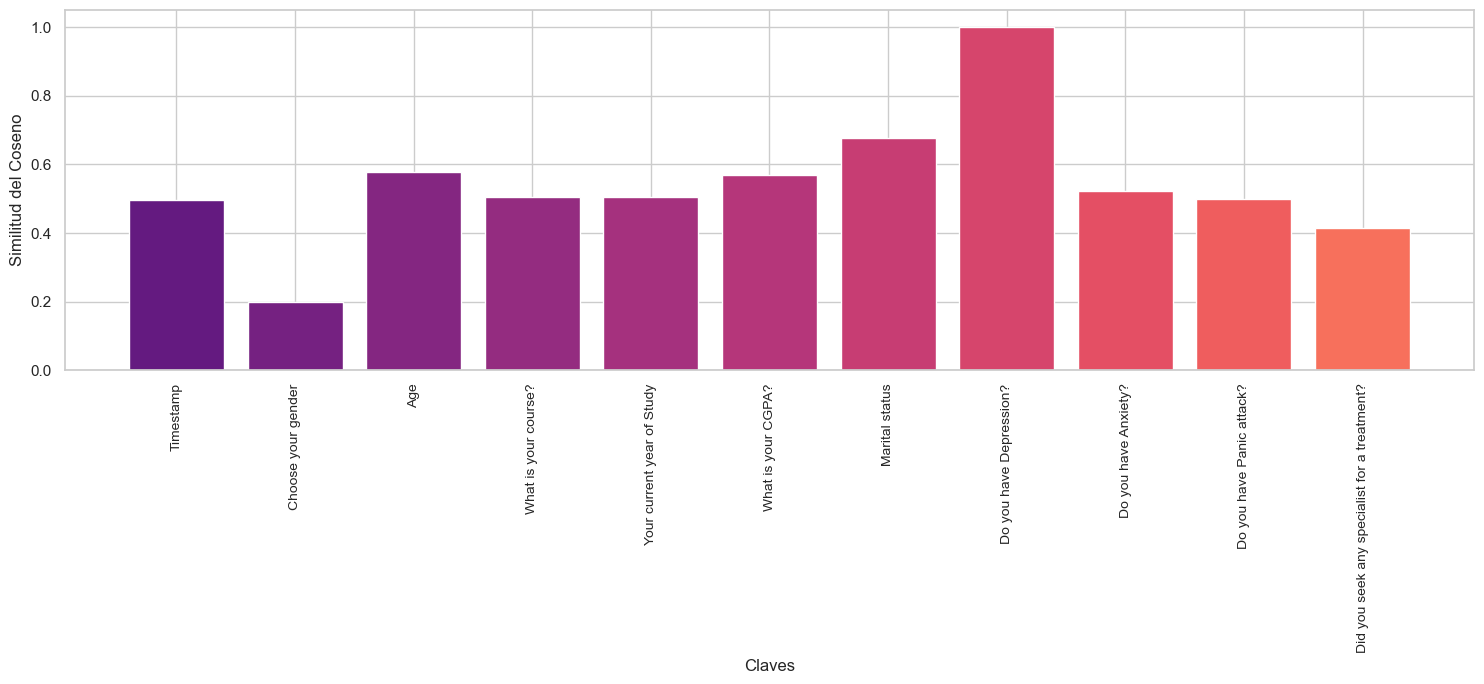

In [49]:
cos = plot_bar_chart(simulitud_coseno)

## Data Preprocessing

In [50]:
X = df.drop(["Do you have Depression?"], axis=1)
y = df["Do you have Depression?"]

In [51]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(60, 10) (20, 10) (21, 10)


In [52]:
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64
------------------------------
Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did yo

## Model Building

In [53]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [54]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [55]:
models = [] 
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  
names = []  
score = []
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 57.99999999999999
Random forest: 53.0
GBM: 67.0
Adaboost: 61.0
Xgboost: 48.0
dtree: 73.0

Validation Performance:

Bagging: 0.5714285714285714
Random forest: 0.5714285714285714
GBM: 0.5714285714285714
Adaboost: 0.5714285714285714
Xgboost: 0.5714285714285714
dtree: 0.5714285714285714


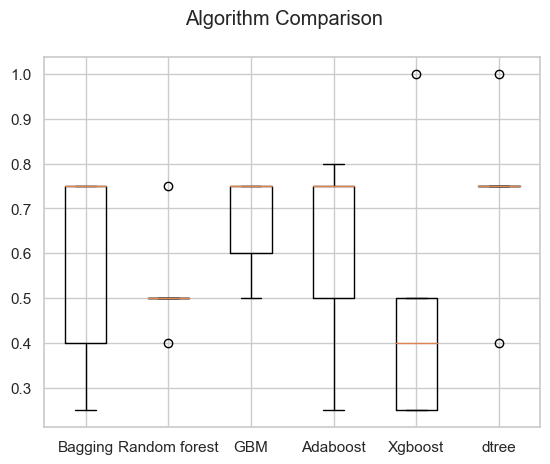

In [56]:
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

### Decision Tree

#### GridSearchCV

In [57]:
model = DecisionTreeClassifier(random_state=1)
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 4, 5, None],
    "min_samples_split": [2, 4, 7, 10, 15],
}


scorer = metrics.make_scorer(metrics.recall_score)


grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5)

grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 4} 
Score: 0.71


In [84]:
dtree_tuned1 = DecisionTreeClassifier(
    random_state=1, criterion="gini", max_depth=5, min_samples_split=2
)

dtree_tuned1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [85]:

dtree_grid_train = model_performance_classification_sklearn(
    dtree_tuned1, X_train, y_train
)
print("Training performance:")
dtree_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.933,0.952,0.870,0.909


In [86]:
dtree_grid_val = model_performance_classification_sklearn(dtree_tuned1, X_val, y_val)
print("Validation performance:")
dtree_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.550,0.571,0.400,0.471


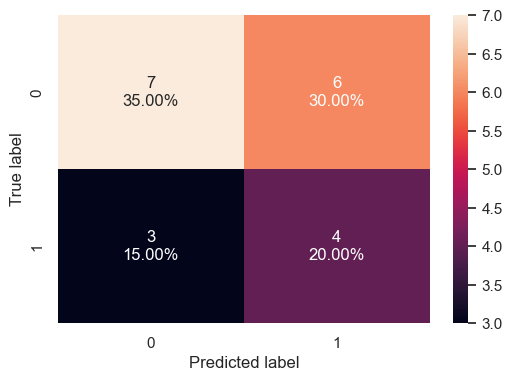

In [87]:
confusion_matrix_sklearn(dtree_tuned1, X_val, y_val)

#### RandomizedSearchCV

In [88]:

model = DecisionTreeClassifier(random_state=1)

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 4, 5, None],
    "min_samples_split": [2, 4, 7, 10, 15],
}

scorer = metrics.make_scorer(metrics.recall_score)


randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_split': 2, 'max_depth': 5, 'criterion': 'gini'} with CV score=0.71:


In [89]:
dtree_tuned2 = DecisionTreeClassifier(
    random_state=1, criterion="gini", max_depth=5, min_samples_split=2
)
dtree_tuned2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [90]:
dtree_random_train = model_performance_classification_sklearn(
    dtree_tuned2, X_train, y_train
)
print("Training performance:")
dtree_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.933,0.952,0.870,0.909


In [91]:
dtree_random_val = model_performance_classification_sklearn(dtree_tuned2, X_val, y_val)
print("Validation performance:")
dtree_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.550,0.571,0.400,0.471


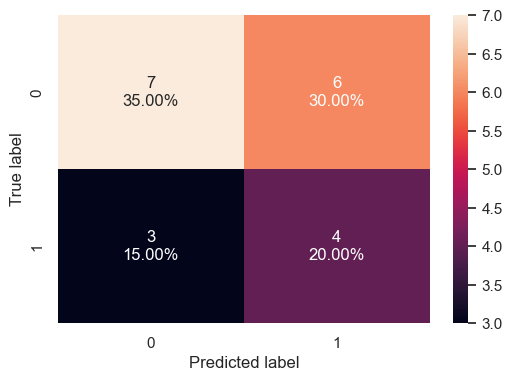

In [92]:

confusion_matrix_sklearn(dtree_tuned1, X_val, y_val)

In [93]:

import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, classification_report


In [100]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

base_model = DecisionTreeClassifier(random_state=1)

model = AdaBoostClassifier(estimator=base_model, random_state=1)

param_grid = {
    "n_estimators": [50, 100, 150],           
    "learning_rate": [0.01, 0.1, 0.5, 1.0],     
    "estimator__max_depth": [1, 2, 3],          
}


scorer = metrics.make_scorer(metrics.recall_score)


grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5)


grid_cv.fit(X_train, y_train)


print("Best Parameters: {}\nBest Score: {:.3f}".format(grid_cv.best_params_, grid_cv.best_score_))


Best Parameters: {'estimator__max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 50}
Best Score: 0.760


In [107]:

base_model = DecisionTreeClassifier(max_depth=3, random_state=1)
adaboost_tuned = AdaBoostClassifier(
    estimator=base_model,   
    n_estimators=50,       
    learning_rate=0.01,
    random_state=1
)


adaboost_tuned.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.01, random_state=1)

In [109]:
ada_random_train = model_performance_classification_sklearn(
    adaboost_tuned, X_train, y_train
)
print("Training performance:")
dtree_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [110]:
ada_random_val = model_performance_classification_sklearn(adaboost_tuned, X_val, y_val)
print("Validation performance:")
dtree_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.550,0.571,0.400,0.471


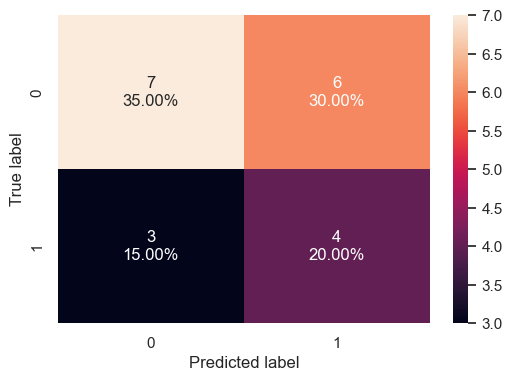

In [111]:

confusion_matrix_sklearn(adaboost_tuned, X_val, y_val)

In [58]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

base_model = DecisionTreeClassifier(random_state=1)


model = BaggingClassifier(estimator=base_model, random_state=1)


param_grid = {
    "n_estimators": [10, 50, 100],              
    "max_samples": [0.5, 0.7, 1.0],            
    "max_features": [0.5, 0.7, 1.0],            
    "estimator__max_depth": [3, 4, 5],         
}


scorer = metrics.make_scorer(metrics.recall_score)


grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5)


grid_cv.fit(X_train, y_train)


print("Best Parameters: {}\nBest Score: {:.3f}".format(grid_cv.best_params_, grid_cv.best_score_))


bagging_tuned = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=grid_cv.best_params_['estimator__max_depth'], random_state=1),
    n_estimators=grid_cv.best_params_['n_estimators'],
    max_samples=grid_cv.best_params_['max_samples'],
    max_features=grid_cv.best_params_['max_features'],
    random_state=1
)

bagging_tuned.fit(X_train, y_train)


Best Parameters: {'estimator__max_depth': 5, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 10}
Best Score: 0.570


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5, random_state=1),
                  max_samples=0.5, random_state=1)

In [59]:
bagging_random_train = model_performance_classification_sklearn(
    bagging_tuned, X_train, y_train
)
print("Training performance:")
bagging_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.917,0.762,1.000,0.865


In [60]:
bagging_random_val = model_performance_classification_sklearn(
    bagging_tuned, X_val, y_val
)
print("Training performance:")
bagging_random_val


Training performance:


,Accuracy,Recall,Precision,F1
0,0.700,0.571,0.571,0.571


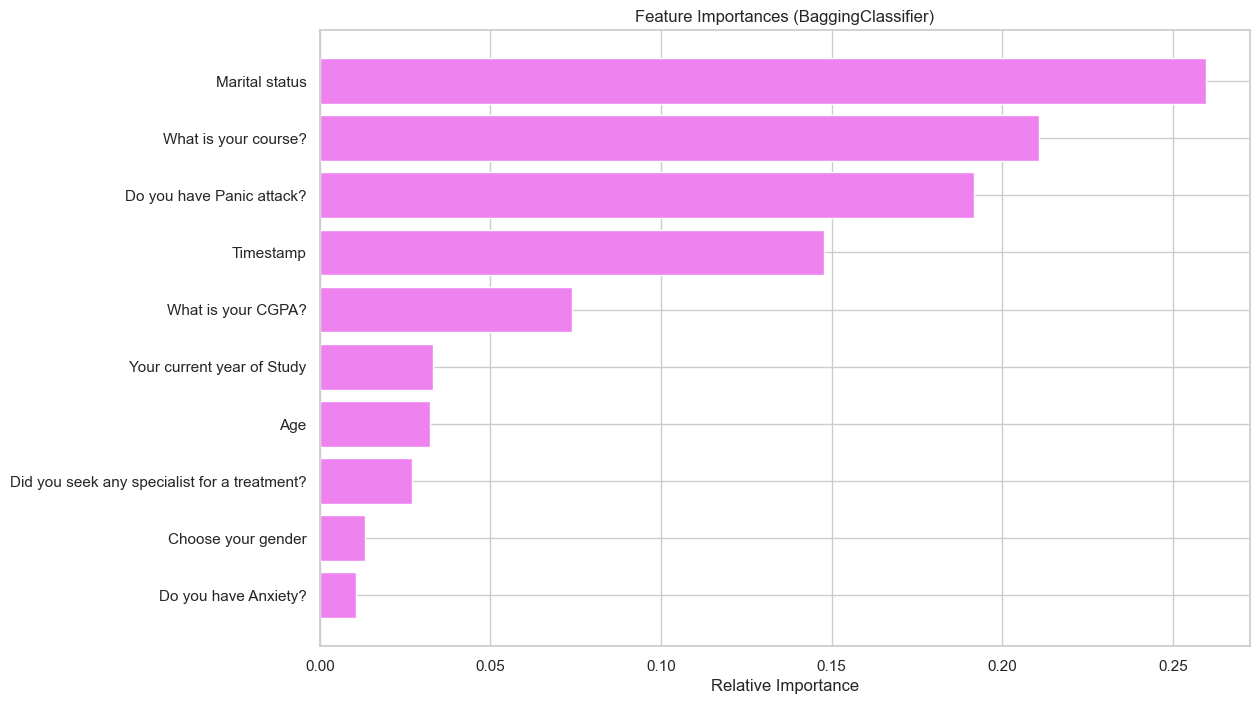

In [61]:

feature_importances = np.mean([
    tree.feature_importances_ for tree in bagging_tuned.estimators_
], axis=0)


feature_names = X_train.columns
indices = np.argsort(feature_importances)


plt.figure(figsize=(12, 8))
plt.title("Feature Importances (BaggingClassifier)")
plt.barh(range(len(indices)), feature_importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


### Pipeline

In [62]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns
    numeric_imputer = SimpleImputer(strategy="median")
    df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

    categorical_columns = df.select_dtypes(include=["object", "string"]).columns

 
    label_encoders = {}
    categorical_mappings = {}

    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  
        categorical_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

    return df, label_encoders, categorical_mappings

df, label_encoders, categorical_mappings = preprocess_data(df)


In [63]:

df, label_encoders, categorical_mappings = preprocess_data(df)

X = df.drop("Do you have Depression?", axis=1)  
y = df["Do you have Depression?"]  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

Final_pipeline_model = Pipeline(
    steps=[
        (
            "Bagging",
            BaggingClassifier(
                estimator=DecisionTreeClassifier(max_depth=grid_cv.best_params_['estimator__max_depth'], random_state=1),
                n_estimators=grid_cv.best_params_['n_estimators'],
                max_samples=grid_cv.best_params_['max_samples'],
                max_features=grid_cv.best_params_['max_features'],
                random_state=1,
            ),
        ),
    ]
)

Final_pipeline_model.fit(X_train, y_train)


Pipeline(steps=[('Bagging',
                 BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                                    random_state=1),
                                   max_samples=0.5, random_state=1))])

In [64]:
# Calculating different metrics on test set
Test_Score = model_performance_classification_sklearn(Final_pipeline_model, X_test, y_test)
print("Final Model performance on Test Dataset:")
Test_Score

Final Model performance on Test Dataset:


,Accuracy,Recall,Precision,F1
0,0.806,0.545,0.857,0.667
